In [1]:
!pip install -r https://raw.githubusercontent.com/malkiAbdelhamid/Advanced-Deep-Learning-2023-2024-esisba/master/lab1_QLearning/requirements_lab1.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00


#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the environment
- the states
- the actions
- the rewards

#### 👉We are using the `Taxi-v3` environment from OpenAI's gym: https://gymnasium.farama.org/environments/toy_text/taxi/

#### 👉`Taxi-v3` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

### Import the Gymnasium Library

In [2]:
import gymnasium as gym

### We create an environment with gym.make()

In [3]:
env=gym.make("Taxi-v3",render_mode="rgb_array")

### We reset the environment to its initial state with state = env.reset()

In [4]:
state=env.reset()

#### State space
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.

Destination on the map are represented with the first letter of the color.

Passenger locations:

0: Red

1: Green

2: Yellow

3: Blue

4: In taxi

Destinations:

0: Red

1: Green

2: Yellow

3: Blue

An observation is returned as an int() that encodes the corresponding state, calculated by ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

Note that there are 400 states that can actually be reached during an episode. The missing states correspond to situations in which the passenger is at the same location as their destination, as this typically signals the end of an episode. Four additional states can be observed right after a successful episodes, when both the passenger and the taxi are at the destination. This gives a total of 404 reachable discrete states.

In [5]:
print("State Space {}".format(env.observation_space.n))

State Space 500


#### Action space
The action shape is (1,) in the range {0, 5} indicating which direction to move the taxi or to pickup/drop off passengers.

0: Move south (down)

1: Move north (up)

2: Move east (right)

3: Move west (left)

4: Pickup passenger

5: Drop off passenger

In [6]:
print("Action Space {}".format(env.action_space.n))


Action Space 6


### Rewards
- -1 per step unless other reward is triggered.

- +20 delivering passenger.

- -10 executing “pickup” and “drop-off” actions illegally.

An action that results a noop, like moving into a wall, will incur the time step penalty. Noops can be avoided by sampling the action_mask returned in info.

### Episode End
The episode ends if the following happens:

- Termination: 1. The taxi drops off the passenger.

- Truncation (when using the time_limit wrapper): 1. The length of the episode is 200.

### Information
step() and reset() return a dict with the following keys:

- p - transition proability for the state.

- action_mask - if actions will cause a transition to a new state.

As taxi is not stochastic, the transition probability is always 1.0. Implementing a transitional probability in line with the Dietterich paper (‘The fickle taxi task’) is a TODO.

For some cases, taking an action will have no effect on the state of the episode. In v0.25.0, info["action_mask"] contains a np.ndarray for each of the actions specifying if the action will change the state.

To sample a modifying action, use action = env.action_space.sample(info["action_mask"]) Or with a Q-value based algorithm action = np.argmax(q_values[obs, np.where(info["action_mask"] == 1)[0]]).

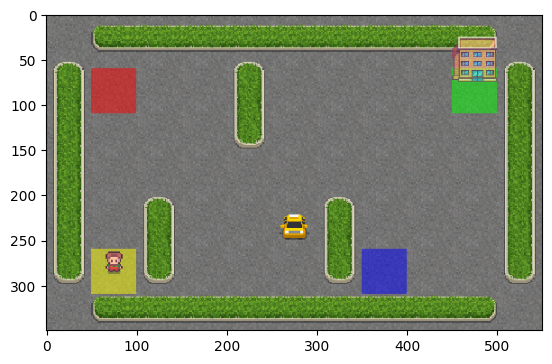

In [7]:
import matplotlib.pyplot as plt
env.reset()

image=env.render()
plt.imshow(image)

249 -1 False False {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}


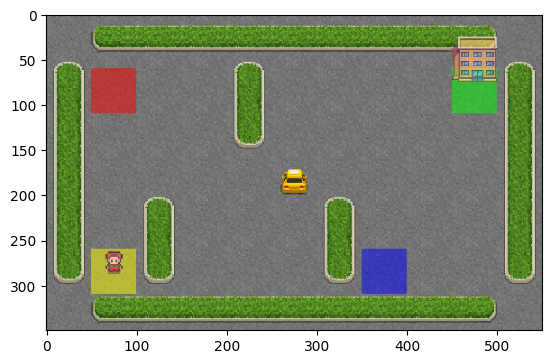

In [8]:
next_state, reward, isTerminated, isTruncated, info=env.step(1)
print(next_state, reward, isTerminated, isTruncated, info)
image=env.render()
plt.imshow(image)

In [9]:
import imageio
import numpy as np
images=[]

env.step(1)
images.append(env.render())

env.step(1)
images.append(env.render())

env.step(1)
images.append(env.render())

env.step(2)
images.append(env.render())

env.step(2)
images.append(env.render())
imageio.mimsave('./render.mp4', [np.array(img) for i, img in enumerate(images)], fps=1)

In [10]:
from base64 import b64encode
from IPython.display import HTML
from IPython import display

# Show video
compressed_path = 'render.mp4'
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


HTML("""<video width=400 controls>      <source src="%s" type="video/mp4"></video>""" % data_url)